<a href="https://colab.research.google.com/github/eildes06/Forecasting/blob/main/RNN_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dtf = pd.read_excel('/content/drive/MyDrive/Data/Veri-Seti.xlsx',index_col='Date', parse_dates = True)

dtf.head()

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2010-01-01,20095.0,37.0,13.1820,2.107385,341244.126
2010-02-01,31172.0,37.0,13.2725,2.073890,351940.949
2010-03-01,51769.0,37.0,12.7275,2.085522,361307.320
2010-04-01,54946.0,37.0,12.0120,2.009010,373575.340
2010-05-01,59377.0,37.0,11.7400,1.948870,387708.051


In [ ]:
dtf.tail()

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
dtf.head()

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2010-01-01,20095.0,37.0,13.1820,2.107385,341244.126
2010-02-01,31172.0,37.0,13.2725,2.073890,351940.949
2010-03-01,51769.0,37.0,12.7275,2.085522,361307.320
2010-04-01,54946.0,37.0,12.0120,2.009010,373575.340
2010-05-01,59377.0,37.0,11.7400,1.948870,387708.051


In [ ]:
 dtf.dropna(inplace= True)

In [ ]:
dtf.shape

(149, 5)

In [ ]:
dtf.duplicated().sum()

0

In [ ]:
dtf.isnull().sum()

Otomotiv Satis    0
OTV Orani         0
Faiz              0
EUR/TL            0
Kredi Stok        0
dtype: int64

In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2010-01-01 to 2022-05-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Otomotiv Satis  149 non-null    float64
 1   OTV Orani       149 non-null    float64
 2   Faiz            149 non-null    float64
 3   EUR/TL          149 non-null    float64
 4   Kredi Stok      149 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


In [ ]:
# dtf.Date.value_counts().sort_values()

In [ ]:
dtf["Otomotiv Satis"].value_counts().sort_values()

20095.0    1
81573.0    1
51769.0    1
54946.0    1
59377.0    1
          ..
62243.0    1
38131.0    1
49652.0    1
60035.0    1
65167.0    1
Name: Otomotiv Satis, Length: 149, dtype: int64

In [ ]:
dtf["Faiz"].value_counts().sort_values()

16.8175    1
11.0125    1
10.7875    1
12.7275    1
12.0120    1
          ..
26.8525    1
21.7950    1
13.1200    2
12.8400    2
15.2100    2
Name: Faiz, Length: 146, dtype: int64

In [ ]:
dtf.describe().T

,count,mean,std,min,25%,50%,75%,max
Otomotiv Satis,149.0,6.590262e+04,2.617580e+04,14373.000000,50008.000000,6.304400e+04,7.981900e+04,1.561730e+05
OTV Orani,149.0,4.369799e+01,5.846811e+00,37.000000,40.000000,4.500000e+01,5.000000e+01,6.500000e+01
Faiz,149.0,1.603438e+01,5.319518e+00,9.607500,12.715000,1.448500e+01,1.747500e+01,3.278250e+01
EUR/TL,149.0,4.808703e+00,3.321767e+00,1.927305,2.464018,3.276861e+00,6.380609e+00,1.656000e+01
Kredi Stok,149.0,1.787554e+06,1.176366e+06,341244.126000,775545.498000,1.474594e+06,2.447479e+06,4.862887e+06


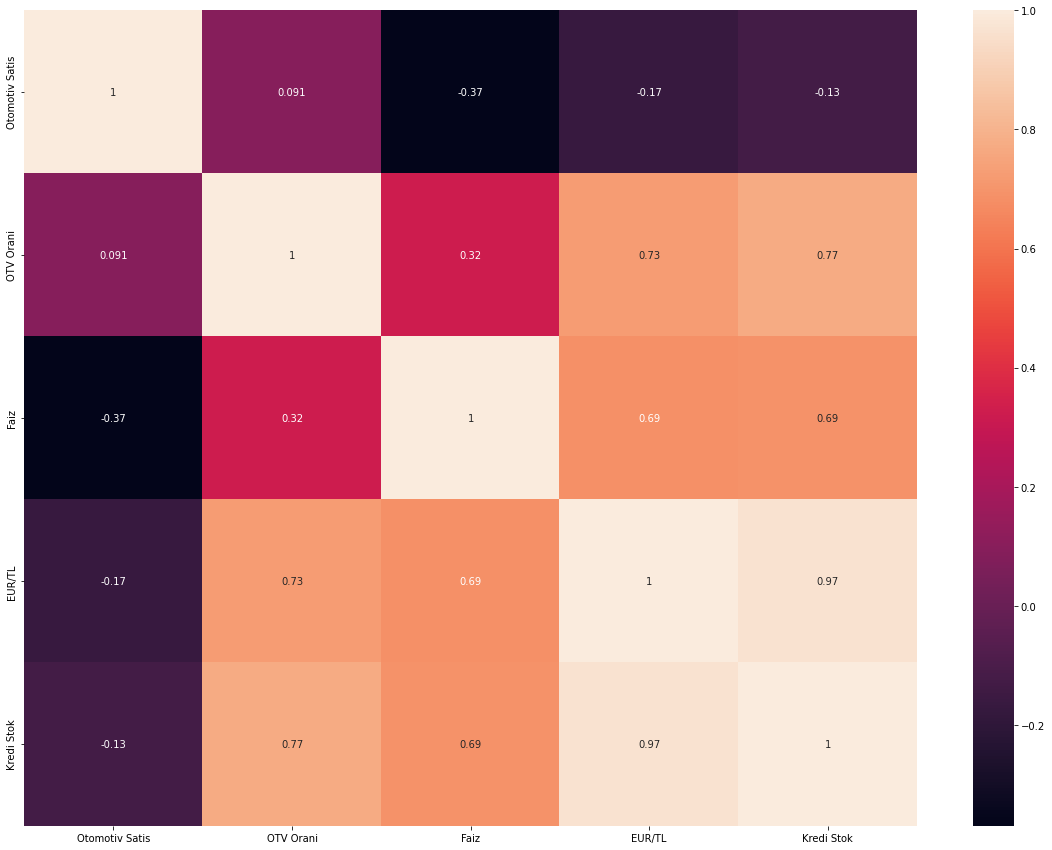

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(dtf.corr(), annot=True);

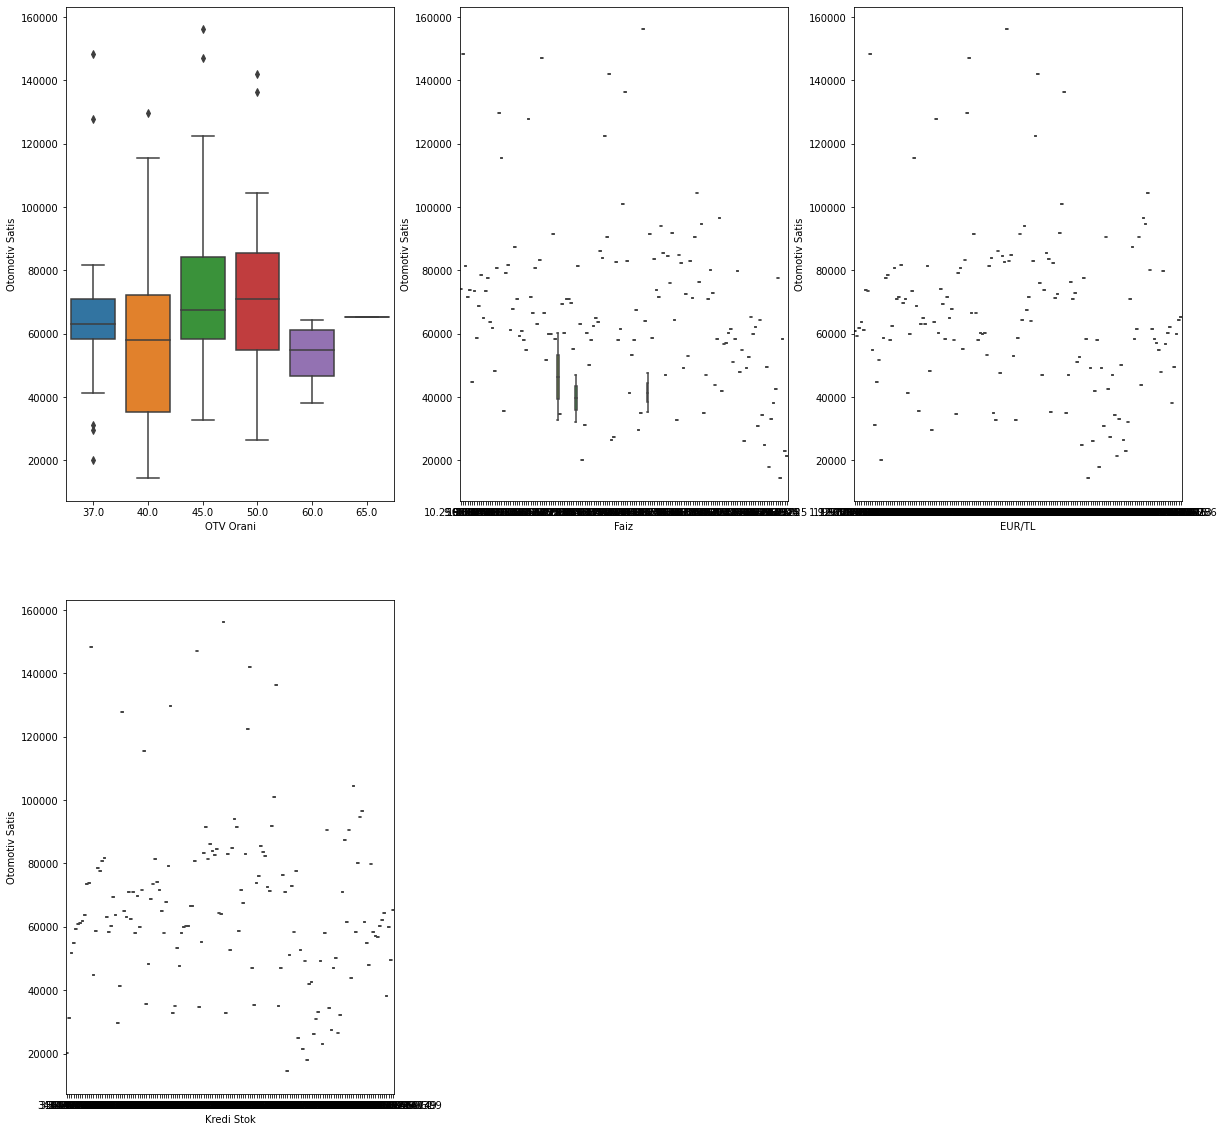

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in dtf:
    if feature != "Otomotiv Satis":
        index += 1
        plt.subplot(2, 3, index)
        sns.boxplot(x=feature, y="Otomotiv Satis", data=dtf)

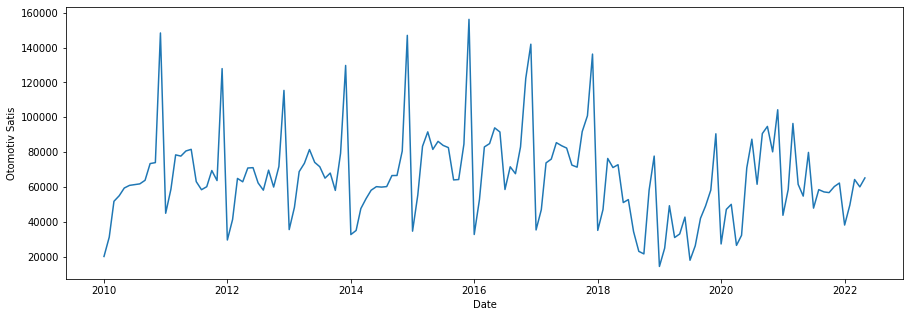

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(dtf.index, "Otomotiv Satis", data=dtf);

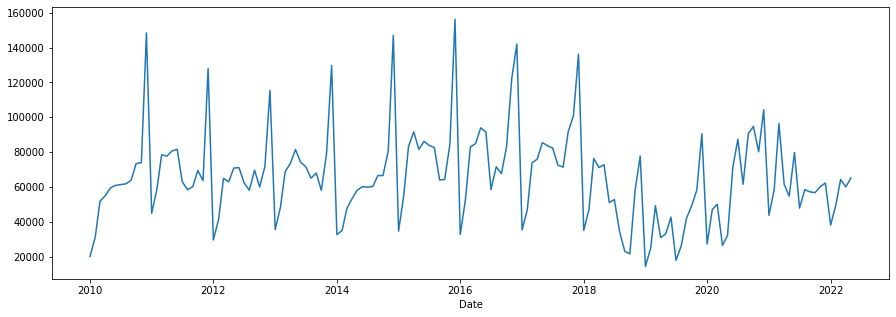

In [ ]:
date_cnt = dtf.groupby("Date")["Otomotiv Satis"].sum()
plt.figure(figsize=(15,5))
sns.lineplot(date_cnt.index, date_cnt.values);

# Train_Test

In [ ]:
train_size = int(len(dtf) -12)
test_size = len(dtf) - train_size

train, test = dtf.iloc[0:train_size], dtf.iloc[train_size:len(dtf)]
print(len(train), len(test))

137 12


In [ ]:
train.shape, test.shape

((137, 5), (12, 5))

In [ ]:
dtf.columns

Index(['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'], dtype='object')

#Scalling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
f_columns = ['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['Otomotiv Satis']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Otomotiv Satis'] = cnt_transformer.transform(train[['Otomotiv Satis']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Otomotiv Satis'] = cnt_transformer.transform(test[['Otomotiv Satis']])

In [ ]:
def create_dataset(X, y, time_steps=7):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "Otomotiv Satis" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)
   

In [ ]:
# generator i ekle 

In [ ]:
train.columns

Index(['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'], dtype='object')

In [ ]:
test

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2021-06-01,0.515504,2.0,2.300986,2.270761,1.500139
2021-07-01,-0.527972,2.0,2.363380,2.214322,1.489419
2021-08-01,-0.181833,2.0,2.234085,2.146906,1.509771
2021-09-01,-0.224688,2.0,2.101690,2.162756,1.574267
2021-10-01,-0.237581,2.0,1.934085,2.343295,1.673923
2021-11-01,-0.124323,2.0,2.139014,2.787762,1.960067
2021-12-01,-0.058163,2.0,3.087324,3.821066,2.111864
2022-01-01,-0.845160,4.0,4.052394,3.829015,2.158637
2022-02-01,-0.469123,4.0,3.658732,3.869168,2.176915


In [ ]:
X_train

NameError: ignored

In [ ]:
time_steps = 11

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train["Otomotiv Satis"], time_steps)
X_test, y_test = create_dataset(test, test["Otomotiv Satis"], time_steps)

print(X_train.shape, y_train.shape)

In [ ]:
X_test

In [ ]:
dtf.shape

# son 12 isin icine katma onlar tahmin etcegin yer 
dataframeden sil 20 test ayir son 12 test ayir. step 12 


In [ ]:
dtf.tail()

In [ ]:
X_train

#RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features =  X_train.shape[2]

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128)))
model.add(Bidirectional(LSTM(units=128)))

# model.add(Dropout(rate=0.2)) 

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights=True)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
type(model)

In [ ]:
model.fit(X_train, y_train, 
          epochs=50, 
          batch_size=24, 
         # validation_split=0.3,
          #shuffle=False,
          callbacks=[early_stop])

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

 #Evaluate on Test Data

In [ ]:
test

In [ ]:
y_pred = model.predict(X_test)